In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/xrovr/Downloads/data2.xls')
df.info()
#sepal_length та petal_width float, але petal_length та sepal_width object. Є пусті колонки 5-7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2394 non-null   float64
 1   sepal_width   2393 non-null   object 
 2   petal_length  2393 non-null   object 
 3   petal_width   2393 non-null   float64
 4   species       2424 non-null   object 
 5                 0 non-null      float64
 6                 0 non-null      float64
 7   .             0 non-null      float64
dtypes: float64(5), object(3)
memory usage: 151.6+ KB


In [2]:
#видалити пусті колонки 5-7
df.drop(df.columns[5:8], axis = 1, inplace = True)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.93,3.66,4.94,2.69,Iris-versicolor
1,6.89,3.79,6.16,2.81,Iris-virginica
2,6.70,3.64,5.99,2.81,Iris-virginica
3,6.74,2.68,4.71,2.29,Iris-versicolor
4,5.96,4.16,2.99,1.56,Iris-setosa


In [3]:
#конвертувати petal_length та sepal_width to float після того як видалили string з колонок
wrong = 'random', 'Random'
df['sepal_width'].replace(wrong, 0, inplace = True)
df['petal_length'].replace(wrong, 0, inplace = True)

df['sepal_width'] = df['sepal_width'].astype(float)
df['petal_length'] = df['petal_length'].astype(float)

In [4]:
df.describe()
#sepal_length не може мати негативне значення, значення < 0 будуть хибними

,sepal_length,sepal_width,petal_length,petal_width
count,2394.000000,2393.000000,2393.000000,2393.000000
mean,6.469511,3.974831,4.624797,2.215061
std,2.540472,1.720079,2.413582,1.755113
min,-10.000000,0.000000,0.000000,0.000000
25%,5.930000,3.440000,2.740000,1.450000
50%,6.700000,4.000000,5.090000,2.220000
75%,7.490000,4.580000,6.150000,2.940000
max,70.000000,70.000000,70.000000,70.000000


In [5]:
df['sepal_length'] = numpy.where(df['sepal_length'] < 0, df['sepal_length'].mean(), df['sepal_length'])
df.describe()
#або так df.loc[df['sepal_length'] < 0, 'sepal_length'] = df['sepal_length'].mean()

,sepal_length,sepal_width,petal_length,petal_width
count,2394.000000,2393.000000,2393.000000,2393.000000
mean,6.615497,3.974831,4.624797,2.215061
std,2.027420,1.720079,2.413582,1.755113
min,0.000000,0.000000,0.000000,0.000000
25%,5.970000,3.440000,2.740000,1.450000
50%,6.700000,4.000000,5.090000,2.220000
75%,7.490000,4.580000,6.150000,2.940000
max,70.000000,70.000000,70.000000,70.000000


In [6]:
#також дивне max значення 70, коли середнє 2-6. Маловірогідно, що воно правильне, викидаємо його
drop_row = df.loc[(df['sepal_length'] > 15) | (df['sepal_width'] > 15) | (df['petal_width'] > 15) | (df['petal_length'] > 15)]
df.drop(index = drop_row.index, inplace = True)

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2393.000000,2392.000000,2392.000000,2392.000000
mean,6.589009,3.947228,4.597467,2.186722
std,1.559440,1.065798,2.009867,1.076663
min,0.000000,0.000000,0.000000,0.000000
25%,5.970000,3.440000,2.740000,1.450000
50%,6.700000,4.000000,5.085000,2.220000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,10.000000,10.000000,10.000000


In [7]:
df.isnull().any().any()
#є багато значень 0 та NaN, які можна замінити. Спочатку переведемо NaN  в 0

True

In [8]:
df.fillna(0, inplace = True)

In [9]:
df[df.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [10]:
#заміна 0 значень mean
df['sepal_length'][0:1001].replace(0, df['sepal_length'].mean(), inplace = True)
df['sepal_width'][0:1001].replace(0, df['sepal_width'].mean(), inplace = True)
df['petal_length'][0:1001].replace(0, df['petal_length'].mean(), inplace = True)
df['petal_width'][0:1001].replace(0, df['petal_width'].mean(), inplace = True)

#заміна ffill, bfill
df[1001:2001].replace(0, method = 'ffill', inplace=True)
df[2001:].replace(0, method = 'bfill', inplace=True)

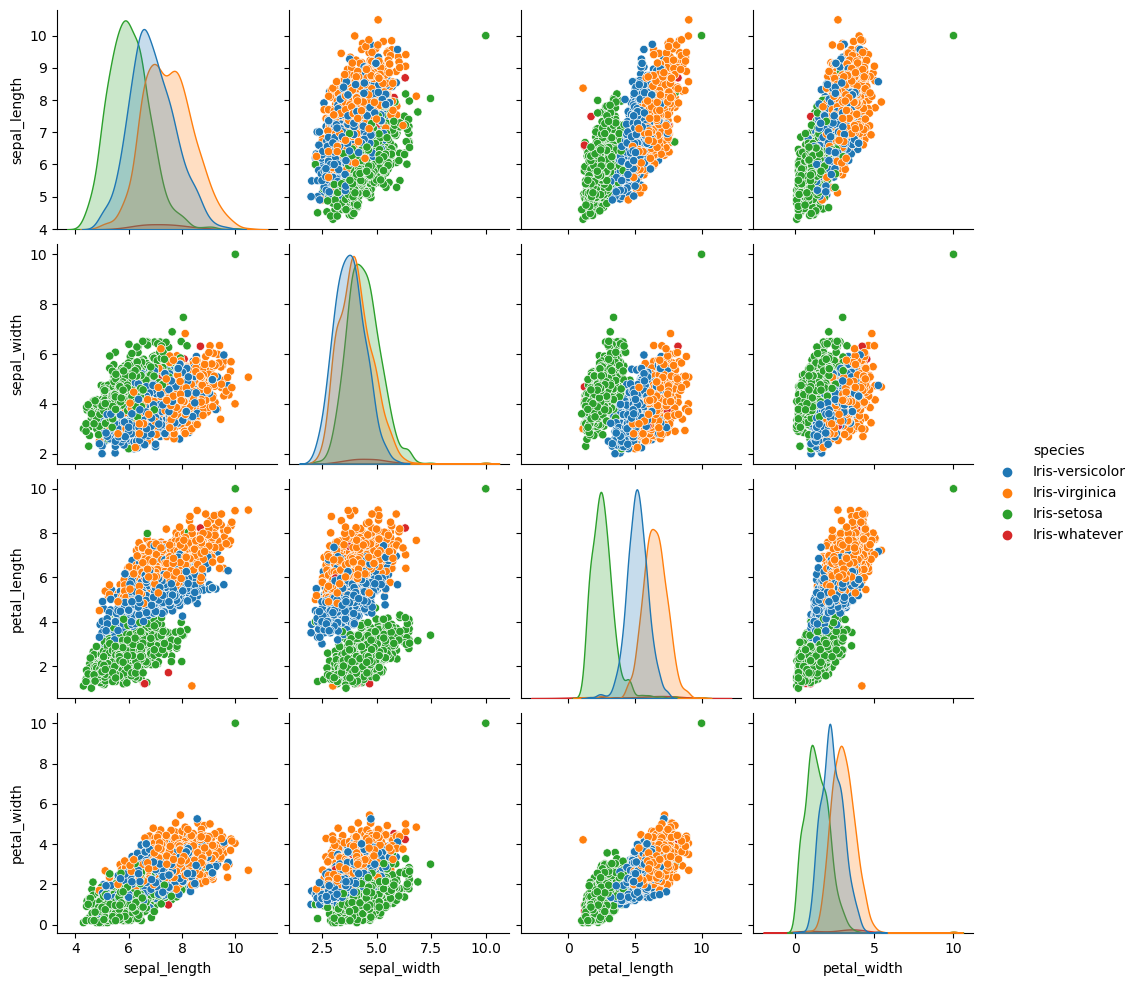

In [11]:
import seaborn as sns

sns.pairplot(df, hue = 'species')
#ще знайдено в легенді 'species' 'iris-whatever'

In [12]:
#у species є підвид iris-whatever, який можливо був хибно класифікований. 
df_whatever = df[df['species'] == 'Iris-whatever']
#щоб не скомпрометувати інші дані, виведу його в окрему df_whatever, і видалю з першої df
df = df[df['species'].str.contains("Iris-whatever") == False]

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2399.000000,2399.000000,2399.000000,2399.000000
mean,6.794566,4.068723,4.737638,2.251008
std,1.032785,0.798849,1.840354,1.004080
min,4.300000,2.000000,1.000000,0.100000
25%,6.070000,3.510000,2.950000,1.520000
50%,6.700000,4.000000,5.100000,2.240000
75%,7.510000,4.580000,6.150000,2.940000
max,10.490000,10.000000,10.000000,10.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2399 non-null   float64
 1   sepal_width   2399 non-null   float64
 2   petal_length  2399 non-null   float64
 3   petal_width   2399 non-null   float64
 4   species       2399 non-null   object 
dtypes: float64(4), object(1)
memory usage: 112.5+ KB


В даних були скореговані наступні моменти:
- всі колонки з числовими даними переведені у float
- видалені колонки 5-7, які не містили даних
- замінені значення < 0, тому що довжина/ширина не може бути менше 0
- видалені row, що містять дані > 15, тому що середнє значення датасету 2-6
- замінені значення 0 та NaN, тепер non-null співпадають з колонкою species
- Iris-whatever виведено в окрему df. Їх теоретично можна було б підігнати під інші види iris у таблиці (за найближчим значенням), але можливо це окремий вид iris. Тому я б перевірила з джерелом данних, звідки береться цей iris-whatever.
- є 2 outliers відповідно у iris-virginica та iris-setosa, але їх значення не занадто відрізняються від датасету, тому їх залишили. 

На данному етапі здається, що дані більш менш підчищені. На графіках відслідковується закономірність і, наприклад, різні види setosa відрізняються за petal_length

In [15]:
X = df[['sepal_length', 'sepal_width', 'petal_length']]
Y = df[['petal_width']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [17]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [18]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [19]:
linear_regression.predict(X_test)
pred = linear_regression.predict(X_test)

In [20]:
pred

array([[2.90069966],
       [1.61439623],
       [2.5634392 ],
       [2.15783176],
       [1.2623916 ],
       [2.37964227],
       [3.11927815],
       [2.16850381],
       [3.11430103],
       [1.7034853 ],
       [2.37313096],
       [3.63004632],
       [3.20692943],
       [2.27835434],
       [2.14618159],
       [2.1409125 ],
       [1.75756948],
       [1.24022198],
       [3.20758231],
       [3.08954765],
       [2.08623535],
       [1.73365145],
       [1.66162327],
       [1.70694406],
       [2.65267443],
       [2.3635362 ],
       [2.35267599],
       [2.35742704],
       [2.83603734],
       [2.595862  ],
       [1.08723892],
       [1.67525434],
       [2.07605741],
       [1.30306396],
       [2.09445077],
       [2.74350205],
       [3.96580257],
       [2.93240288],
       [1.96341363],
       [1.83109061],
       [2.1723182 ],
       [2.48340342],
       [3.1086324 ],
       [1.91815575],
       [3.71543921],
       [1.14876447],
       [1.64325287],
       [2.753

In [21]:
# Explained variance score: 1 is perfect prediction
print('Variance score: ', linear_regression.score(X, Y))

Variance score:  0.7184355084336793


Згодували 'sepal_length', 'sepal_width', 'petal_length' (без розділення на вид iris) до лінійної моделі, і отримали variance 0.718. Якщо variance 1 значив би perfect fit, то успішність передбачень цієї моделі 72%. 
Тепер розділимо по підвидам

In [22]:
#setosa
X1 = df[df['species']=='Iris-setosa'].drop(labels = ['petal_width', 'species'], axis=1)
Y1 = df[df['species']=='Iris-setosa']['petal_width']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state = 100)
linear_regression1 = LinearRegression()
linear_regression1.fit(X1_train, Y1_train)
linear_regression1.predict(X1_test)
pred1 = linear_regression1.predict(X1_test)
print('Variance score: ', linear_regression1.score(X1, Y1))

Variance score:  0.5745828168675762


In [23]:
#versicolor
X2 = df[df['species']=='Iris-versicolor'].drop(labels = ['petal_width', 'species'], axis=1)
Y2 = df[df['species']=='Iris-versicolor']['petal_width']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state = 100)
linear_regression2 = LinearRegression()
linear_regression2.fit(X2_train, Y2_train)
linear_regression2.predict(X2_test)
pred1 = linear_regression1.predict(X2_test)
print('Variance score: ', linear_regression1.score(X2, Y2))

Variance score:  0.5084169284567281


In [24]:
#virginica
X3 = df[df['species']=='Iris-virginica'].drop(labels = ['petal_width', 'species'], axis=1)
Y3 = df[df['species']=='Iris-virginica']['petal_width']

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.30, random_state = 100)
linear_regression3 = LinearRegression()
linear_regression3.fit(X3_train, Y3_train)
linear_regression3.predict(X3_test)
pred1 = linear_regression1.predict(X3_test)
print('Variance score: ', linear_regression1.score(X3, Y3))

Variance score:  0.32245180549870867


In [25]:
df[df['species'] == 'Iris-virginica'].count()

sepal_length    800
sepal_width     800
petal_length    800
petal_width     800
species         800
dtype: int64

In [26]:
df[df['species'] == 'Iris-setosa'].count()

sepal_length    799
sepal_width     799
petal_length    799
petal_width     799
species         799
dtype: int64

In [27]:
df[df['species'] == 'Iris-versicolor'].count()

sepal_length    800
sepal_width     800
petal_length    800
petal_width     800
species         800
dtype: int64

Кожного виду iris в таблиці однакова кількість (799 для Iris - setosa), але точність передбачення petal_width різна. Найбільш точне передбачення було отримано коли до моделі було згодовано весь датасет без розділення на підвиди iris). Коли згодовували лише індивідуальні види iris, точність передбачення впала. За умови, що дослідження було зроблено правильно (сумнівно), можна зробити висновок, що, по перше, як вже сказали, більше даних дали кращий результат, але також, по друге, що у iris-versicolor є більша залежність petal_width від інших показників (57.4%), а у iris-virginica найменша (32.2%) на основі проаналізованих даних. 